## Heston Model

This notebook implements the Heston model to simulate stock prices where volatility itself changes randomly over time. Unlike the Black-Scholes model, the Heston model allows for stochastic volatility, making it more realistic for financial markets.

### Key steps:
- Simulate price and variance paths using the Heston stochastic volatility model
- Estimate the price of a European call option using Monte Carlo
- Compare the Heston price to Black-Scholes to see how stochastic volatility affects option valuation

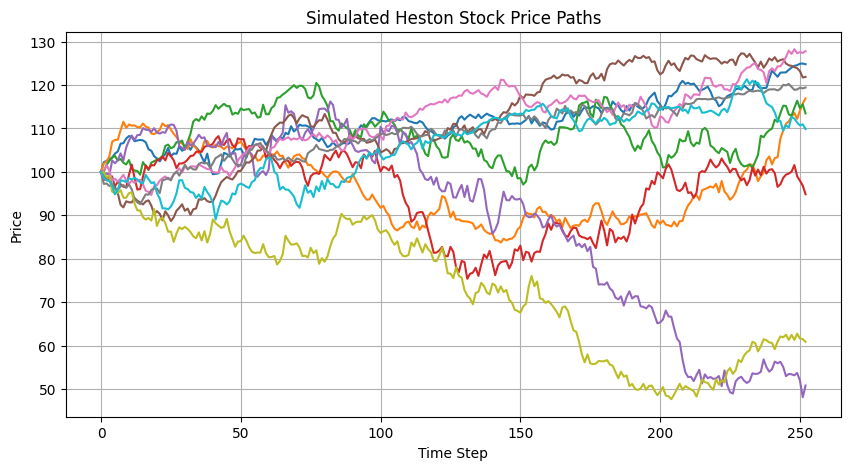

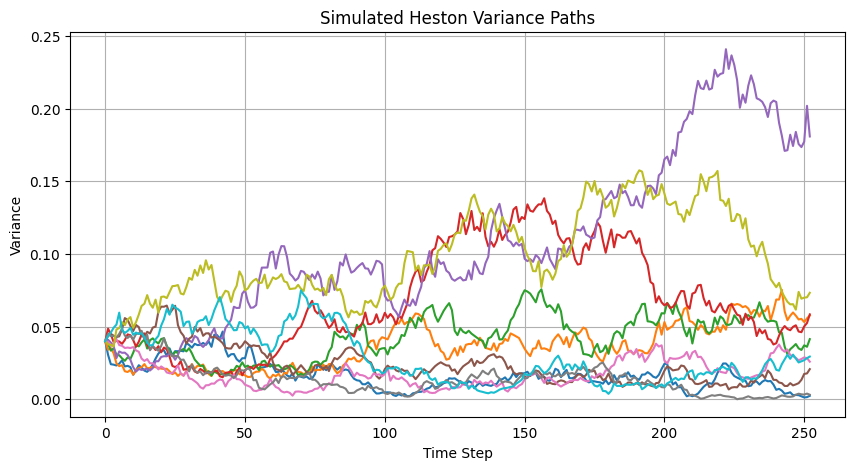

In [3]:
import sys
sys.path.append("../models")
from heston import heston_sim
import matplotlib.pyplot as plt
import numpy as np

S_paths, v_paths = heston_sim(S0=100, v0=0.04, r=0.05, kappa=2.0, theta=0.04, sigma_v=0.3, rho=-0.7, T=1, N=252, M=1000)

# Plot a few stock price paths
plt.figure(figsize=(10, 5))
plt.plot(S_paths[:10].T)
plt.title("Simulated Heston Stock Price Paths")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid()
plt.show()

# Plot corresponding volatility paths
plt.figure(figsize=(10, 5))
plt.plot(v_paths[:10].T)
plt.title("Simulated Heston Variance Paths")
plt.xlabel("Time Step")
plt.ylabel("Variance")
plt.grid()
plt.show()


In [10]:
from black_scholes import black_scholes_price
def price_european_call_mc(S_paths, K, r, T):
    ST = S_paths[:, -1]  # terminal prices at maturity
    payoff = np.maximum(ST - K, 0)
    return np.exp(-r * T) * payoff.mean()

# Estimate the option price from Heston simulation
heston_price = price_european_call_mc(S_paths, 100, 0.05, 1)
print(f"Heston European Call Price: {heston_price:.4f}")

Heston European Call Price: 10.4077
